In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('/home/hungcucu/Documents/usth/machine learning/Practice_1/Advertising.csv')
df['x0']=1
print(df.head())
X=df[['x0','TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
X['x0']=1
print(X[0:10],Y[0:10])
import random
def initialize(dim):
    theta=np.random.rand(dim)
    return theta
theta=initialize(4)


def predict_Y(theta,X):
    return  np.dot(X,theta)

import math
def get_cost(Y,Y_hat,theta,lambda_):
    Y_resd=Y-Y_hat
    reg_term = lambda_*np.sum(np.square(theta))
    return (np.sum(np.dot(Y_resd.T,Y_resd))+reg_term)/len(Y-Y_resd)


def update_theta(x,y,y_hat,theta_o,learning_rate,lambda_):
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    reg_term = lambda_*learning_rate*theta_o/len(y)
    theta_1=theta_o - learning_rate*dw - reg_term
    return theta_1


def run_gradient_descent(X,Y,alpha,num_iterations,lambda_):
    theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(theta,X)
        this_cost=get_cost(Y,Y_hat,theta,lambda_)
        prev_theta=theta
        theta=update_theta(X,Y,Y_hat,prev_theta,alpha,lambda_)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of theta : ",theta)
    return gd_iterations_df,theta


   Unnamed: 0     TV  radio  newspaper  sales  x0
0           1  230.1   37.8       69.2   22.1   1
1           2   44.5   39.3       45.1   10.4   1
2           3   17.2   45.9       69.3    9.3   1
3           4  151.5   41.3       58.5   18.5   1
4           5  180.8   10.8       58.4   12.9   1
   x0        TV     radio  newspaper
0   1  0.967425  0.979066   1.774493
1   1 -1.194379  1.080097   0.667903
2   1 -1.512360  1.524637   1.779084
3   1  0.051919  1.214806   1.283185
4   1  0.393196 -0.839507   1.278593
5   1 -1.611365  1.726701   2.040809
6   1 -1.042960  0.642293  -0.323896
7   1 -0.312652 -0.246787  -0.870303
8   1 -1.612530 -1.425491  -1.357019
9   1  0.614501 -1.391814  -0.429504 [ 1.54816813 -0.69430382 -0.90513451  0.85817677 -0.21514314 -1.30762948
 -0.42597384 -0.15764386 -1.76762372 -0.65597096]


In [21]:
gd_iterations_df,theta = run_gradient_descent(X,Y,0.01,200,0.01)


Final Estimate of theta :  [0.005121   0.74750283 0.52147271 0.01457433]


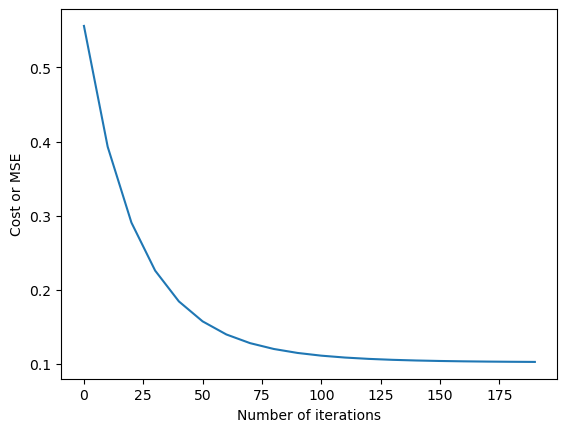

    iteration      cost
15      150.0  0.104162
16      160.0  0.103686
17      170.0  0.103338
18      180.0  0.103082
19      190.0  0.102892


In [22]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")
plt.show()
print(gd_iterations_df.tail())